## How to Perform Feature Selection With Numerical Input Data
https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

 Feature 0: 16.527385 
 Feature 1: 131.325562 
 Feature 2: 0.042371 
 Feature 3: 1.415216 
 Feature 4: 12.778966 
 Feature 5: 49.209523 
 Feature 6: 13.377142 
 Feature 7: 25.126440 


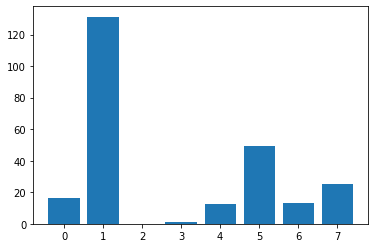

In [2]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import mutual_info_classif
from matplotlib import pyplot
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename, header=None)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y

# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k= 'all' )
    #fs = SelectKBest(score_func=mutual_info_classif, k= 'all' )
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
# load the dataset
X, y = load_dataset( '../Datasets/pima-indians-diabetes.csv' )
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print( ' Feature %d: %f ' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# fit the model
model = LogisticRegression(solver= 'liblinear' )
model.fit(X_train_fs, y_train)
# evaluate the model
yhat = model.predict(X_test_fs)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print( ' Accuracy: %.2f ' % (accuracy*100))

 Accuracy: 77.56 


In [6]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
pipeline = Pipeline(steps=[( 'anova' ,fs), ( 'lr' , model)])
# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the grid
grid = dict()
grid[ 'anova__k' ] = [i+1 for i in range(X.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring= 'accuracy' , n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X, y)
# summarize best
print( ' Best Mean Accuracy: %.3f ' % results.best_score_)
print( ' Best Config: %s ' % results.best_params_)

 Best Mean Accuracy: 0.770 
 Best Config: {'anova__k': 5} 
